In [1]:
#|default_exp app

# Bearify

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def which_bear(x): pass

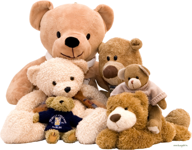

In [9]:
im = PILImage.create('images/teddy.jpg')
im.thumbnail((192,192))
im

In [6]:
import pathlib

In [7]:
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [8]:
learn = load_learner('bear_model.pkl')

In [15]:
pathlib.PosixPath = temp

In [16]:
learn.predict(im)

('teddy', tensor(2), tensor([3.1420e-05, 7.4805e-06, 9.9996e-01]))

In [12]:
categories = ('Teddy', 'Black', 'Grizzly')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [13]:
classify_image(im)

{'Teddy': 3.141982961096801e-05,
 'Black': 7.480457043129718e-06,
 'Grizzly': 0.9999611377716064}

In [14]:
image = gr.inputs.Image(shape = (192,192))
labels = gr.outputs.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels)
intf.launch(inline=False)

AttributeError: module 'gradio' has no attribute 'inputs'